In [1]:
with open('/Users/willlevine/Downloads/harry_potter.txt', 'r') as file:
    data = file.read().replace('\n', '').replace("- J.K. Rowling ", '')

In [2]:
sentences = data.split(".")

In [3]:
len(sentences)

6178

In [4]:
suspicious_sentences = []
suspicious_sentences.append("Bob entered his password incorrectly.") 
suspicious_sentences.append("Bob mistyped his password many times.")
suspicious_sentences.append("Bob repeatedly entered the wrong password")
suspicious_sentences.append("Incorrect passwords were typed trying to get into Bob's account")
suspicious_sentences.append("There were security issues with Bob's account")

In [5]:
from sentence_transformers import SentenceTransformer

/Users/willlevine/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
spacing = int(len(sentences) / len(suspicious_sentences))
for i in range(len(suspicious_sentences)):
    sentences[i * spacing] = suspicious_sentences[i]

In [7]:
model = SentenceTransformer("all-mpnet-base-v2")

In [8]:
from tqdm import tqdm
sentence_embeddings = []
for i in tqdm(range(int(len(sentences) / 64))):
    sentence_embeddings.extend(model.encode(sentences[i * 64 : (i + 1) * 64]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [01:23<00:00,  1.15it/s]


In [241]:
query_sentence = "incorrect password and security issues."
query_embedding = model.encode(query_sentence)

In [242]:
reduced_sentence_embeddings, reduced_query_embedding = np.array(sentence_embeddings), query_embedding

In [243]:
from sklearn.neighbors import KDTree
tree = KDTree(reduced_sentence_embeddings)

In [244]:
from numpy import dot
from numpy.linalg import norm
similarities = [dot(reduced_sentence_embeddings[i], reduced_query_embedding) / (norm(reduced_sentence_embeddings[i]) * norm(reduced_query_embedding)) for i in range(len(sentence_embeddings))]

Text(0.5, 0, 'Threat Score')

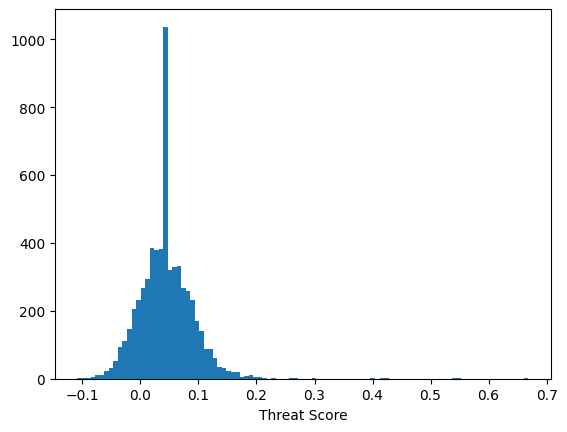

In [245]:
import matplotlib.pyplot as plt
plt.hist(similarities, bins = 100)
plt.xlabel("Threat Score")

In [246]:
similar_sentence_indices = np.where(np.array(similarities) > .4)[0]

In [247]:
np.array(sentences)[similar_sentence_indices]

array(['Bob entered his password incorrectly.',
       'Bob repeatedly entered the wrong password',
       ' “Thank goodness you found me! I’ve been out here for hours, I couldn’t remember the new password to get in to bed',
       ' The password’s ‘Pig snout’ but it won’t help you now, the Fat Lady’s gone off somewhere',
       "Incorrect passwords were typed trying to get into Bob's account",
       "There were security issues with Bob's account"], dtype='<U1185')

In [248]:
_, similar_sentence_neighbor_indices = tree.query(np.array(sentence_embeddings)[similar_sentence_indices], k = 5)

In [249]:
np.concatenate(np.array(similar_sentence_neighbor_indices)[:, 1:])

array([2470, 3705, 1235, 4940,    0, 1235, 3705, 4940, 2608, 2470, 3054,
       3364, 3052, 3451, 3899, 3034,    0, 2470, 4940, 1235, 3705, 1235,
          0, 2470])

In [ ]:
similar_sentence_neighbors = np.unique(np.array(sentences)[np.concatenate(np.array(similar_sentence_neighbor_indices))])

In [253]:
similar_sentence_neighbors

array([' The Fat Lady had gone on a nighttime visit and Hermione was locked out of Gryffindor Tower',
       ' The password’s ‘Pig snout’ but it won’t help you now, the Fat Lady’s gone off somewhere',
       ' “Password?” she said', ' “Pig snout,” they said and entered',
       ' “Thank goodness you found me! I’ve been out here for hours, I couldn’t remember the new password to get in to bed',
       ' “The key’s in the lock,” Harry muttered',
       ' “Who’s there?” squawked the Fat Lady',
       'Bob entered his password incorrectly.',
       'Bob mistyped his password many times.',
       'Bob repeatedly entered the wrong password',
       "Incorrect passwords were typed trying to get into Bob's account",
       "There were security issues with Bob's account"], dtype='<U1185')